In [2]:
""" Create a heatmap comparing width vs r vs performance for pinet on cifar10.
"""

import pandas as pd
import glob
import os
import seaborn as sns
sns.set_theme()
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import numpy as np

def load_all_pkl(folder):
    pkl_paths = glob.glob(os.path.join(folder, "*.df"), recursive=True)
    print(len(pkl_paths))
    list_of_dfs = []
    for path in pkl_paths:
        try:
            df = pd.read_pickle(path)
        except:
            continue
        list_of_dfs.append(df)
    return pd.concat(list_of_dfs)

In [3]:
# collect results - run on sandbox after downloading amlt results
fin_df = load_all_pkl(f'./cifar10/pt/sm_sweep-1.1/**/')    #munet  
#bigdf_1.to_pickle("cifar10-mu-all.df")
# bigdf_1 = load_all_pkl(f'/home/misantac/amlt/valued-werewolf/**/')   #finpinet 
# bigdf_1.to_pickle("cifar10-pifinnet-all.df")
# bigdf_1 = load_all_pkl(f'/home/misantac/amlt/evident-kingfish/**/')   #infnet
# bigdf_1.to_pickle("cifar10-inf-all.df")


17659


    width   r  train_acc
46      4   4     23.480
48      4   8     37.040
37      4  16     31.700
48      4  32     37.832
44      4  64     36.466
39      8   4     39.312
45      8   8     45.140
49      8  16     43.384
48      8  32     43.722
49      8  64     42.724
48     16   4     39.262
32     16   8     45.598
49     16  16     52.404
34     16  32     52.186
46     16  64     52.796
47     32   4     39.474
40     32   8     46.930
49     32  16     52.830
44     32  32     60.236
45     32  64     60.414
33     64   4     40.852
42     64   8     48.348
46     64  16     55.392
46     64  32     59.118
35     64  64     64.362
30    128   4     40.550
42    128   8     49.552
47    128  16     55.802
40    128  32     60.586
49    128  64     66.022
40    256   4     41.294
48    256   8     51.038
37    256  16     58.582
44    256  32     61.646
41    256  64     66.822


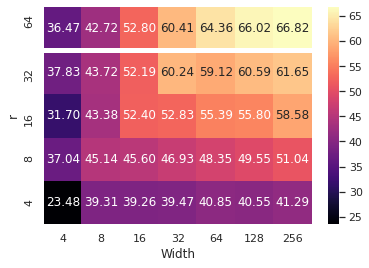

In [20]:
'''
mu_df = pd.read_pickle("cifar10-mu-all.df")
new_df = []
for width in [128, 256, 512, 1024, 2048]:
    df_row = mu_df[mu_df['width'] == width]
    df_row = df_row[df_row.test_acc == df_row.test_acc.max()]
    new_df.append(df_row)
df =  pd.concat(new_df)

inf_df = pd.read_pickle("cifar10-inf-all.df")
new_df = []
for r in [50, 100, 200, 400]:
    df_row = inf_df[inf_df['r'] == r]
    df_row = df_row[df_row.test_acc == df_row.test_acc.max()]
    new_df.append(df_row)
inf_df =  pd.concat(new_df)

fin_df = pd.read_pickle("cifar10-pifinnet-all.df")
'''
new_df = []
for width in [4, 8, 16, 32, 64, 128, 256]:
    for r in [4, 8, 16, 32, 64,]:
        df_row = fin_df[((fin_df['r'] == r) & (fin_df['width'] == width))]
        df_row = df_row[df_row.test_acc == df_row.test_acc.max()]
        df_row = df_row[df_row.train_acc == df_row.train_acc.max()]
        new_df.append(df_row)
#new_df.append(inf_df)
new_df =  pd.concat(new_df)



new_df['r'] = new_df['r'].astype(int)
#df["r"] = 'MuNet'
#new_df = new_df.append(df)[['width', 'r', 'test_acc']].drop_duplicates()

new_df['width'].fillna(0, inplace=True)
new_df['width'] = new_df['width'].astype(int)
new_df['width'].replace(0, "Infinite", inplace=True)
new_df['train_acc']  *= 100
new_df = new_df[['width', 'r', 'train_acc']]
new_df = new_df.drop_duplicates()
print(new_df[['width', 'r', 'train_acc']])
new_df = new_df.pivot("r", "width", "train_acc")
ax = sns.heatmap(new_df, annot=True, fmt=".2f", cmap='magma')

ax.invert_yaxis()
plt.ylabel('r')
plt.xlabel('Width')

yticks = ax.get_yticks()
yticks[-1] = 4.75
ylabels = ax.get_yticklabels()
ax.set_yticks(yticks)
ax.set_yticklabels(ylabels)

# https://stackoverflow.com/questions/62773944/insert-line-in-heatmap-after-every-7th-column
b, t = plt.xlim()
ax.hlines(y = 4, xmin = b-1, xmax = t, colors = 'white', lw = 5)
plt.show()


In [17]:
new_df.columns

Index(['batch_size', 'bias_alpha', 'bias_lr_mult', 'cuda', 'cycarr', 'data',
       'depth', 'epoch', 'epoch_time', 'epochs', 'first_layer_alpha',
       'first_layer_lr_mult', 'float', 'gaussian_init', 'gclip',
       'gclip_drop_milestones', 'gclip_drop_ratio', 'gclip_per_param', 'human',
       'init_from_data', 'last_bias_alpha', 'last_layer_alpha',
       'last_layer_grad_no_alpha', 'last_layer_lr_mult', 'layernorm', 'loss',
       'lr', 'lr_drop_milestones', 'lr_drop_ratio', 'max_test_acc',
       'max_test_acc_epoch', 'min_test_loss', 'min_test_loss_epoch',
       'momentum', 'no_Gproj', 'no_apply_lr_mult_to_wd', 'prunetol', 'quiet',
       'r', 'save_dir', 'save_model', 'scheduler', 'seed', 'test_acc',
       'test_batch_size', 'test_loss', 'train_acc', 'train_loss', 'verbose',
       'wd', 'width'],
      dtype='object')